In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Compute the norm of the discrete function
def lp_norm(dx, func, p):
    return np.sum(np.abs(func)**p * dx)

def Lawson_norm(dx, func, p, eps):
    return np.sum(dx * func**2 / (func**2 + eps**2)**(1-p/2))

def Lawson_norm_deriv(dx, func, p, eps):
    
    # Cell face distance
    h = (dx[:-1] + dx[1:])/2
    h_scale = h.min()
    return np.sum(
        h * 
        ((func[1:] - func[:-1]) / h)**2 / 
        (((func[1:] - func[:-1]) / h)**2 + (eps)**2)**(1-p/2))

Lp-norm: 1.660549e-01
Lawson-norm: 1.660297e-01


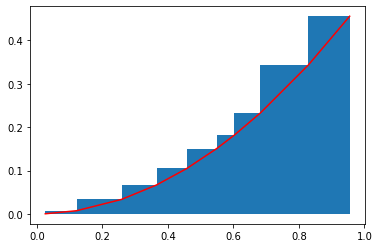

In [37]:
# Create a simple function on a random mesh from [0, 1]
nC = 10
dx = np.random.rand(nC)

# Normalize the grid from 0 to 1
dx /= np.sum(dx)

# Define cell center locations
x = np.cumsum(dx) - dx/2

f_x = 0.5*x**2

# The theoritical integral of x**2 on interval [0,1] for p=1
int_f = 0.5/3 * (1)**3

fig, axs = plt.figure(), plt.subplot()
axs.fill_between(x, f_x, step="pre")
axs.plot(x, f_x, 'r')

epsilon = 1e-3
print("Lp-norm: %e" % lp_norm(dx, f_x, 1))
print("Lawson-norm: %e" % Lawson_norm(dx, f_x, 1, epsilon))

Lp-norm: 5.000000e-01
Lawson-norm: 4.873502e-01
Lawson-norm deriv: 4.433785e-01


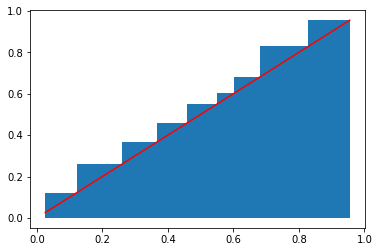

In [49]:
# Repeat with derivative of f_x
df_x_dx = x

# The theoritical integral of f(x) for p=1
int_df_x_dx = 1

fig, axs = plt.figure(), plt.subplot()
axs.fill_between(x, df_x_dx, step="pre")

axs.plot(x, df_x_dx, 'r')

epsilon = 1e-1
print("Lp-norm: %e" % lp_norm(dx, df_x_dx, 1))
print("Lawson-norm: %e" % Lawson_norm(dx, df_x_dx, 1, epsilon))
print("Lawson-norm deriv: %e" % Lawson_norm_deriv(dx, f_x, 1, epsilon))

In [50]:
np.int32

SyntaxError: invalid syntax (<ipython-input-50-084798caa9f7>, line 1)